In [1]:
# DBNOs - Number of enemy players knocked.
# assists - Number of enemy players this player damaged that were killed by teammates.
# boosts - Number of boost items used.
# damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
# headshotKills - Number of enemy players killed with headshots.
# heals - Number of healing items used.
# Id - Player’s Id
# killPlace - Ranking in match of number of enemy players killed.
# killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
# killStreaks - Max number of enemy players killed in a short amount of time.
# kills - Number of enemy players killed.
# longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
# matchDuration - Duration of match in seconds.
# matchId - ID to identify match. There are no matches that are in both the training and testing set.
# matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
# rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
# revives - Number of times this player revived teammates.
# rideDistance - Total distance traveled in vehicles measured in meters.
# roadKills - Number of kills while in a vehicle.
# swimDistance - Total distance traveled by swimming measured in meters.
# teamKills - Number of times this player killed a teammate.
# vehicleDestroys - Number of vehicles destroyed.
# walkDistance - Total distance traveled on foot measured in meters.
# weaponsAcquired - Number of weapons picked up.
# winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
# groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
# numGroups - Number of groups we have data for in the match.
# maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
# winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import shap

In [6]:
df = pd.read_csv('C:\\Users\\azefr\\OneDrive\\Desktop\\Cheating Detection System for Multiplayer Games\\Datasets\\Cheating Detection.csv')

In [7]:
df.head(30)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,is_anomaly
0,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.000000,91.470000,0.000000,0.000000,0.000000,57,...,0.004500,0.0,11.040000,0.0,0.0,1434.000000,5.000000,0,0.6400,0
1,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.000000,32.900000,0.000000,0.000000,0.000000,75,...,0.000000,0.0,0.000000,0.0,0.0,202.700000,3.000000,0,0.1667,0
2,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.000000,100.000000,0.000000,0.000000,0.000000,45,...,0.000000,0.0,0.000000,0.0,0.0,49.750000,2.000000,0,0.1875,0
3,ff79c12f326506,289a6836a88d27,bac52627a12114,0.0,0.000000,100.000000,1.000000,1.000000,0.000000,44,...,0.000000,0.0,0.000000,0.0,0.0,34.700000,1.000000,0,0.0370,0
4,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,96,...,0.000000,0.0,0.000000,0.0,0.0,31.748186,2.633857,1497,0.0000,1
5,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0.0,0.000000,42.320500,0.000000,0.000000,0.000000,48,...,9040.620509,0.0,0.000000,0.0,0.0,5182.588959,18.442287,1500,0.7368,1
6,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0.0,0.000000,51.600000,0.000000,0.000000,0.000000,64,...,0.000000,0.0,0.000000,0.0,0.0,799.900000,4.000000,0,0.3704,0
7,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0.0,0.000000,37.270000,0.000000,0.000000,0.000000,74,...,0.000000,0.0,0.000000,0.0,0.0,65.670000,1.000000,0,0.2143,0
8,2b574d43972813,c549efede67ad3,2dd6ddb8320fc1,0.0,0.000000,28.380000,0.000000,0.000000,0.000000,75,...,0.000000,0.0,0.000000,0.0,0.0,868.300000,9.000000,0,0.3929,0
9,ce4f6ac165705e,da24cdb91969cc,535b5dbd965a94,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,37,...,14034.443979,0.0,0.000000,0.0,0.0,13523.413604,20.995186,0,0.9286,1


In [8]:
df.shape

(440255, 30)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440255 entries, 0 to 440254
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               440255 non-null  object 
 1   groupId          440255 non-null  object 
 2   matchId          440255 non-null  object 
 3   assists          418180 non-null  float64
 4   boosts           418180 non-null  float64
 5   damageDealt      418180 non-null  float64
 6   DBNOs            418180 non-null  float64
 7   headshotKills    418180 non-null  float64
 8   heals            418180 non-null  float64
 9   killPlace        440255 non-null  int64  
 10  killPoints       440255 non-null  int64  
 11  kills            418180 non-null  float64
 12  killStreaks      418180 non-null  float64
 13  longestKill      418180 non-null  float64
 14  matchDuration    440255 non-null  int64  
 15  matchType        440255 non-null  object 
 16  maxPlace         440255 non-null  int6

In [10]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'is_anomaly'],
      dtype='object')

In [11]:
df.isna().sum()

Id                     0
groupId                0
matchId                0
assists            22075
boosts             22075
damageDealt        22075
DBNOs              22075
headshotKills      22075
heals              22075
killPlace              0
killPoints             0
kills              22075
killStreaks        22075
longestKill        22075
matchDuration          0
matchType              0
maxPlace               0
numGroups              0
rankPoints             0
revives            22075
rideDistance       22075
roadKills          22075
swimDistance       22075
teamKills          22075
vehicleDestroys    22075
walkDistance       22075
weaponsAcquired    22075
winPoints              0
winPlacePerc           0
is_anomaly             0
dtype: int64

In [12]:
# Replacing NaN values of column boosts             
print('Total NaN Values Present : ',df['boosts'].isna().sum())
print('Unique Values : ',df['boosts'].unique())
print('Minimum Value Present',df['boosts'].min())
print('Maximum Value Present',df['boosts'].max())
print('Skewed : ',df['boosts'].skew())

Total NaN Values Present :  22075
Unique Values :  [ 0.          1.         13.25450145 ...  2.66256909  8.33412926
  2.24888233]
Minimum Value Present 0.0
Maximum Value Present 104.78958627151624
Skewed :  3.810541131785806


In [13]:
print(df['boosts'])

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
440250    8.334129
440251    0.000000
440252    0.000000
440253    0.000000
440254    2.248882
Name: boosts, Length: 440255, dtype: float64


In [14]:
boost_median = df['boosts'].median()
df['boosts'] = df['boosts'].fillna(boost_median)

In [15]:
# Replacing NaN values of column assists
print('Total NaN Values Present : ',df['assists'].isna().sum())
print('Unique Values : ',df['assists'].unique())
print('Minimum Value Present',df['assists'].min())
print('Maximum Value Present',df['assists'].max())
print('Skewed : ',df['assists'].skew())          

Total NaN Values Present :  22075
Unique Values :  [ 0.                 nan  1.         ...  5.64871102  9.90452768
 10.32963807]
Minimum Value Present 0.0
Maximum Value Present 55.443780114353785
Skewed :  6.335184485210309


In [16]:
print(df['assists'])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
440250    0.0
440251    0.0
440252    0.0
440253    0.0
440254    0.0
Name: assists, Length: 440255, dtype: float64


In [17]:
assists_median = df['assists'].median()
df['assists'] = df['assists'].fillna(assists_median)

In [18]:
# Replacing NaN values of column damageDealt        
print('Total NaN Values Present : ',df['damageDealt'].isna().sum())
print('Unique Values : ',df['damageDealt'].unique())
print('Minimum Value Present',df['damageDealt'].min())
print('Maximum Value Present',df['damageDealt'].max())
print('Skewed : ',df['damageDealt'].skew())  

Total NaN Values Present :  22075
Unique Values :  [ 91.47        32.9        100.         ... 109.65674665 749.31963363
 121.64844135]
Minimum Value Present 0.0
Maximum Value Present 24543.41891840208
Skewed :  5.226706025220046


In [19]:
df['damageDealt']

0          91.470000
1          32.900000
2         100.000000
3         100.000000
4           0.000000
             ...    
440250    749.319634
440251    670.530526
440252    121.648441
440253      0.000000
440254      0.000000
Name: damageDealt, Length: 440255, dtype: float64

In [20]:
damageDealt_median = df['damageDealt'].median()
df['damageDealt'] = df['damageDealt'].fillna(damageDealt_median)

In [21]:
# Replacing NaN values of column DBNOs              
print('Total NaN Values Present : ',df['DBNOs'].isna().sum())
print('Unique Values : ',df['DBNOs'].unique())
print('Minimum Value Present',df['DBNOs'].min())
print('Maximum Value Present',df['DBNOs'].max())
print('Skewed : ',df['DBNOs'].skew())

Total NaN Values Present :  22075
Unique Values :  [0.         1.                nan ... 4.89327575 3.05497387 4.75559239]
Minimum Value Present 0.0
Maximum Value Present 117.5307209813098
Skewed :  5.448467530847884


In [22]:
df['DBNOs']

0         0.000000
1         0.000000
2         0.000000
3         1.000000
4         0.000000
            ...   
440250    3.054974
440251    3.170406
440252    0.000000
440253    0.000000
440254    4.755592
Name: DBNOs, Length: 440255, dtype: float64

In [23]:
DBNOs_median = df['DBNOs'].median()
df['DBNOs'] = df['DBNOs'].fillna(DBNOs_median)

In [24]:
# Replacing NaN values of column headshotKills                    
print('Total NaN Values Present : ',df['headshotKills'].isna().sum())
print('Unique Values : ',df['headshotKills'].unique())
print('Minimum Value Present',df['headshotKills'].min())
print('Maximum Value Present',df['headshotKills'].max())
print('Skewed : ',df['headshotKills'].skew())

Total NaN Values Present :  22075
Unique Values :  [0.         1.         2.         ... 5.76716193 4.58038061 4.07538229]
Minimum Value Present 0.0
Maximum Value Present 56.85704331618298
Skewed :  7.027843522993936


In [25]:
df['headshotKills']

0         0.0
1         0.0
2         0.0
3         1.0
4         0.0
         ... 
440250    0.0
440251    0.0
440252    0.0
440253    0.0
440254    0.0
Name: headshotKills, Length: 440255, dtype: float64

In [26]:
headshotKills_median = df['headshotKills'].median()
df['headshotKills'] = df['headshotKills'].fillna(headshotKills_median)

In [27]:
# Replacing NaN values of column heals             
print('Total NaN Values Present : ',df['heals'].isna().sum())
print('Unique Values : ',df['heals'].unique())
print('Minimum Value Present',df['heals'].min())
print('Maximum Value Present',df['heals'].max())
print('Skewed : ',df['heals'].skew())

Total NaN Values Present :  22075
Unique Values :  [ 0.          5.          2.         ...  8.79305008 20.32047028
 15.70428019]
Minimum Value Present 0.0
Maximum Value Present 161.83405704911652
Skewed :  5.62857010248005


In [28]:
df['heals']

0          0.00000
1          0.00000
2          0.00000
3          0.00000
4          0.00000
            ...   
440250    20.32047
440251     0.00000
440252     0.00000
440253     0.00000
440254    15.70428
Name: heals, Length: 440255, dtype: float64

In [29]:
heals_median = df['heals'].median()
df['heals'] = df['heals'].fillna(heals_median)

In [30]:
# Replacing NaN values of column kills             
print('Total NaN Values Present : ',df['kills'].isna().sum())
print('Unique Values : ',df['kills'].unique())
print('Minimum Value Present',df['kills'].min())
print('Maximum Value Present',df['kills'].max())
print('Skewed : ',df['kills'].skew())

Total NaN Values Present :  22075
Unique Values :  [ 0.          1.          4.         ...  2.93278702  3.35302559
 10.34750316]
Minimum Value Present 0.0
Maximum Value Present 149.7283788404827
Skewed :  5.495876249171285


In [31]:
df['kills']

0          0.000000
1          0.000000
2          1.000000
3          1.000000
4          0.000000
            ...    
440250    10.347503
440251     0.000000
440252     0.000000
440253     0.000000
440254     0.000000
Name: kills, Length: 440255, dtype: float64

In [32]:
kills_median = df['kills'].median()
df['kills'] = df['kills'].fillna(kills_median)

In [33]:
# Replacing NaN values of column killStreaks             
print('Total NaN Values Present : ',df['killStreaks'].isna().sum())
print('Unique Values : ',df['killStreaks'].unique())
print('Minimum Value Present',df['killStreaks'].min())
print('Maximum Value Present',df['killStreaks'].max())
print('Skewed : ',df['killStreaks'].skew())

Total NaN Values Present :  22075
Unique Values :  [0.         1.         2.57612556 ... 3.65051104 2.69202086 5.33195862]
Minimum Value Present 0.0
Maximum Value Present 29.1800075730506
Skewed :  2.8501123371400956


In [34]:
killStreaks_median = df['killStreaks'].median()
df['killStreaks'] = df['killStreaks'].fillna(killStreaks_median)

In [35]:
# Replacing NaN values of column killStreaks             
print('Total NaN Values Present : ',df['killStreaks'].isna().sum())
print('Unique Values : ',df['killStreaks'].unique())
print('Minimum Value Present',df['killStreaks'].min())
print('Maximum Value Present',df['killStreaks'].max())
print('Skewed : ',df['killStreaks'].skew())

Total NaN Values Present :  0
Unique Values :  [0.         1.         2.57612556 ... 3.65051104 2.69202086 5.33195862]
Minimum Value Present 0.0
Maximum Value Present 29.1800075730506
Skewed :  2.9308932453509007


In [36]:
killStreaks_median = df['killStreaks'].median()
df['killStreaks'] = df['killStreaks'].fillna(killStreaks_median)

In [37]:
df['longestKill']

0           0.000000
1           0.000000
2          58.530000
3          18.440000
4           0.000000
             ...    
440250    254.416027
440251      0.000000
440252      0.000000
440253      0.000000
440254      0.000000
Name: longestKill, Length: 440255, dtype: float64

In [38]:
# Replacing NaN values of column longestKill             
print('Total NaN Values Present : ',df['longestKill'].isna().sum())
print('Unique Values : ',df['longestKill'].unique())
print('Minimum Value Present',df['longestKill'].min())
print('Maximum Value Present',df['longestKill'].max())
print('Skewed : ',df['longestKill'].skew())

Total NaN Values Present :  22075
Unique Values :  [  0.          58.53        18.44       ...  80.61932415 183.30845053
 254.41602692]
Minimum Value Present 0.0
Maximum Value Present 4649.749618539521
Skewed :  6.75645639056039


In [39]:
longestKill_median = df['longestKill'].median()
df['longestKill'] = df['longestKill'].fillna(longestKill_median)

In [40]:
# Replacing NaN values of column revives             
print('Total NaN Values Present : ',df['revives'].isna().sum())
print('Unique Values : ',df['revives'].unique())
print('Minimum Value Present',df['revives'].min())
print('Maximum Value Present',df['revives'].max())
print('Skewed : ',df['revives'].skew())

Total NaN Values Present :  22075
Unique Values :  [0.         1.                nan ... 4.94076506 2.83657136 2.44398055]
Minimum Value Present 0.0
Maximum Value Present 55.52192827883043
Skewed :  6.752040432409983


In [41]:
df['revives']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
440250    0.0
440251    0.0
440252    0.0
440253    0.0
440254    0.0
Name: revives, Length: 440255, dtype: float64

In [42]:
revives_median = df['revives'].median()
df['revives'] = df['revives'].fillna(revives_median)

In [43]:
# Replacing NaN values of column rideDistance             
print('Total NaN Values Present : ',df['rideDistance'].isna().sum())
print('Unique Values : ',df['rideDistance'].unique())
print('Minimum Value Present',df['rideDistance'].min())
print('Maximum Value Present',df['rideDistance'].max())
print('Skewed : ',df['rideDistance'].skew())

Total NaN Values Present :  22075
Unique Values :  [4.50000000e-03 0.00000000e+00 9.04062051e+03 ... 1.32791543e+04
 1.16598301e+04 8.46756325e+03]
Minimum Value Present 0.0
Maximum Value Present 100602.10816093978
Skewed :  5.6694098565510584


In [44]:
df['rideDistance']

0             0.004500
1             0.000000
2             0.000000
3             0.000000
4             0.000000
              ...     
440250    13279.154327
440251        0.000000
440252    11659.830074
440253        0.000000
440254     8467.563251
Name: rideDistance, Length: 440255, dtype: float64

In [45]:
rideDistance_median = df['rideDistance'].median()
df['rideDistance'] = df['rideDistance'].fillna(rideDistance_median)

In [46]:
# Replacing NaN values of column roadKills             
print('Total NaN Values Present : ',df['roadKills'].isna().sum())
print('Unique Values : ',df['roadKills'].unique())
print('Minimum Value Present',df['roadKills'].min())
print('Maximum Value Present',df['roadKills'].max())
print('Skewed : ',df['roadKills'].skew())

Total NaN Values Present :  22075
Unique Values :  [ 0.                 nan  1.          2.645804    4.55076498  3.11019762
  2.596232    2.          4.10003491  2.60140984  3.58257509  2.38833573
  3.32066834 11.44182251  4.          2.34846653  3.          4.57448846
  4.06008129  5.          3.50467907  2.42451254  3.74873283  4.8293881
  4.35383202  6.          3.27495697  3.37744056  7.34226946  2.03958838
  5.67066587  2.52681252  2.85607297  4.27528082  3.76577152  3.19569999
  6.49200117  4.8230359   4.39939351  3.85705817  3.07454529  2.45456071
  3.93525096  4.58631147  2.58025032  4.32602257 11.32828867  4.57822976
  2.30579888  6.64480877  4.3751592   3.74454356  3.34746716  2.2958532
  3.04077223  4.43607979  6.27928384  2.21262441  4.45366171  4.26305758
  3.95949329  3.69840859  2.91656839  4.41749758  4.09319686  3.34182228
  6.69977166  3.80843012  4.43168999  3.84409998  2.49552622  2.65336201
 10.39694217  3.59377182  3.56583692  4.97260478  2.9510993   4.97578055
  

In [47]:
df['roadKills']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
440250    0.0
440251    0.0
440252    0.0
440253    0.0
440254    0.0
Name: roadKills, Length: 440255, dtype: float64

In [48]:
roadKills_median = df['roadKills'].median()
df['roadKills'] = df['roadKills'].fillna(roadKills_median)

In [49]:
# Replacing NaN values of column swimDistance             
print('Total NaN Values Present : ',df['swimDistance'].isna().sum())
print('Unique Values : ',df['swimDistance'].unique())
print('Minimum Value Present',df['swimDistance'].min())
print('Maximum Value Present',df['swimDistance'].max())
print('Skewed : ',df['swimDistance'].skew())

Total NaN Values Present :  22075
Unique Values :  [ 11.04         0.          76.84       ... 243.70142186  72.03254012
 252.51575639]
Minimum Value Present 0.0
Maximum Value Present 8298.024776156515
Skewed :  23.247665350324876


In [50]:
swimDistance_median = df['swimDistance'].median()
df['swimDistance'] = df['swimDistance'].fillna(swimDistance_median)

In [51]:
# Replacing NaN values of column teamKills             
print('Total NaN Values Present : ',df['teamKills'].isna().sum())
print('Unique Values : ',df['teamKills'].unique())
print('Minimum Value Present',df['teamKills'].min())
print('Maximum Value Present',df['teamKills'].max())
print('Skewed : ',df['teamKills'].skew())

Total NaN Values Present :  22075
Unique Values :  [0.                nan 1.         ... 2.57636678 2.88976148 2.74617386]
Minimum Value Present 0.0
Maximum Value Present 35.036613808600805
Skewed :  14.43342864270587


In [52]:
df['teamKills']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
440250    0.0
440251    0.0
440252    0.0
440253    0.0
440254    0.0
Name: teamKills, Length: 440255, dtype: float64

In [53]:
teamKills_median = df['teamKills'].median()
df['teamKills'] = df['teamKills'].fillna(teamKills_median)

In [54]:
# Replacing NaN values of column teamKills             
print('Total NaN Values Present : ',df['vehicleDestroys'].isna().sum())
print('Unique Values : ',df['vehicleDestroys'].unique())
print('Minimum Value Present',df['vehicleDestroys'].min())
print('Maximum Value Present',df['vehicleDestroys'].max())
print('Skewed : ',df['vehicleDestroys'].skew())

Total NaN Values Present :  22075
Unique Values :  [0.                nan 1.         ... 3.20248249 4.02544854 3.44093935]
Minimum Value Present 0.0
Maximum Value Present 14.861219584733544
Skewed :  20.88364829279949


In [55]:
df['vehicleDestroys']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
440250    0.0
440251    0.0
440252    0.0
440253    0.0
440254    0.0
Name: vehicleDestroys, Length: 440255, dtype: float64

In [56]:
vehicleDestroys_median = df['vehicleDestroys'].median()
df['vehicleDestroys'] = df['vehicleDestroys'].fillna(vehicleDestroys_median)

In [57]:
print(df.isna().sum())

Id                     0
groupId                0
matchId                0
assists                0
boosts                 0
damageDealt            0
DBNOs                  0
headshotKills          0
heals                  0
killPlace              0
killPoints             0
kills                  0
killStreaks            0
longestKill            0
matchDuration          0
matchType              0
maxPlace               0
numGroups              0
rankPoints             0
revives                0
rideDistance           0
roadKills              0
swimDistance           0
teamKills              0
vehicleDestroys        0
walkDistance       22075
weaponsAcquired    22075
winPoints              0
winPlacePerc           0
is_anomaly             0
dtype: int64


In [58]:
df['weaponsAcquired']

0          5.000000
1          3.000000
2          2.000000
3          1.000000
4          2.633857
            ...    
440250    17.151347
440251     2.356844
440252    13.909626
440253    15.624225
440254    11.335090
Name: weaponsAcquired, Length: 440255, dtype: float64

In [59]:
# Replacing NaN values of column weaponsAcquired             
print('Total NaN Values Present : ',df['weaponsAcquired'].isna().sum())
print('Unique Values : ',df['weaponsAcquired'].unique())
print('Minimum Value Present',df['weaponsAcquired'].min())
print('Maximum Value Present',df['weaponsAcquired'].max())
print('Skewed : ',df['weaponsAcquired'].skew())

Total NaN Values Present :  22075
Unique Values :  [ 5.          3.          2.         ... 13.90962562 15.62422518
 11.33509026]
Minimum Value Present 0.0
Maximum Value Present 282.88620910850943
Skewed :  3.3973773114779653


In [60]:
weaponsAcquired_median = df['weaponsAcquired'].median()
df['weaponsAcquired'] = df['weaponsAcquired'].fillna(weaponsAcquired_median)

In [61]:
print(df.isna().sum())

Id                     0
groupId                0
matchId                0
assists                0
boosts                 0
damageDealt            0
DBNOs                  0
headshotKills          0
heals                  0
killPlace              0
killPoints             0
kills                  0
killStreaks            0
longestKill            0
matchDuration          0
matchType              0
maxPlace               0
numGroups              0
rankPoints             0
revives                0
rideDistance           0
roadKills              0
swimDistance           0
teamKills              0
vehicleDestroys        0
walkDistance       22075
weaponsAcquired        0
winPoints              0
winPlacePerc           0
is_anomaly             0
dtype: int64


In [62]:
df['walkDistance']

0         1434.000000
1          202.700000
2           49.750000
3           34.700000
4           31.748186
             ...     
440250    8240.780858
440251     113.910639
440252    5214.592272
440253    6401.394210
440254    5442.531970
Name: walkDistance, Length: 440255, dtype: float64

In [63]:
# Replacing NaN values of column walkDistance             
print('Total NaN Values Present : ',df['walkDistance'].isna().sum())
print('Unique Values : ',df['walkDistance'].unique())
print('Minimum Value Present',df['walkDistance'].min())
print('Maximum Value Present',df['walkDistance'].max())
print('Skewed : ',df['walkDistance'].skew())

Total NaN Values Present :  22075
Unique Values :  [1434.          202.7          49.75       ... 5214.59227209 6401.39421036
 5442.53196972]
Minimum Value Present 0.0
Maximum Value Present 54403.0468830496
Skewed :  2.7044911674215744


In [64]:
walkDistance_median = df['walkDistance'].median()
df['walkDistance'] = df['walkDistance'].fillna(walkDistance_median)

In [65]:
print(df.isna().sum())

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
is_anomaly         0
dtype: int64


In [66]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,is_anomaly
0,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.000000,91.470000,0.000000,0.0,0.00000,57,...,0.004500,0.0,11.04,0.0,0.0,1434.000000,5.000000,0,0.6400,0
1,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.000000,32.900000,0.000000,0.0,0.00000,75,...,0.000000,0.0,0.00,0.0,0.0,202.700000,3.000000,0,0.1667,0
2,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.000000,100.000000,0.000000,0.0,0.00000,45,...,0.000000,0.0,0.00,0.0,0.0,49.750000,2.000000,0,0.1875,0
3,ff79c12f326506,289a6836a88d27,bac52627a12114,0.0,0.000000,100.000000,1.000000,1.0,0.00000,44,...,0.000000,0.0,0.00,0.0,0.0,34.700000,1.000000,0,0.0370,0
4,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0.0,0.000000,0.000000,0.000000,0.0,0.00000,96,...,0.000000,0.0,0.00,0.0,0.0,31.748186,2.633857,1497,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440250,1309f812d5baf3,3891b2252bd136,c01a8efd6874bf,0.0,8.334129,749.319634,3.054974,0.0,20.32047,10,...,13279.154327,0.0,0.00,0.0,0.0,8240.780858,17.151347,0,0.7083,1
440251,27e93361a003c8,9125226f7da03a,23cca936cf94a9,0.0,0.000000,670.530526,3.170406,0.0,0.00000,86,...,0.000000,0.0,0.00,0.0,0.0,113.910639,2.356844,0,0.0435,1
440252,0c43955fd7b432,25d81d61479986,36e62e8c4f4cc8,0.0,0.000000,121.648441,0.000000,0.0,0.00000,54,...,11659.830074,0.0,0.00,0.0,0.0,5214.592272,13.909626,1417,0.6458,1
440253,aec766c4b77af4,39d06b40d87db8,d346c3881baf9f,0.0,0.000000,0.000000,0.000000,0.0,0.00000,39,...,0.000000,0.0,0.00,0.0,0.0,6401.394210,15.624225,0,0.8571,1


In [67]:
# Dropping Duplicates
df.drop_duplicates(inplace=True)

In [68]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,is_anomaly
0,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.000000,91.470000,0.000000,0.0,0.00000,57,...,0.004500,0.0,11.04,0.0,0.0,1434.000000,5.000000,0,0.6400,0
1,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.000000,32.900000,0.000000,0.0,0.00000,75,...,0.000000,0.0,0.00,0.0,0.0,202.700000,3.000000,0,0.1667,0
2,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.000000,100.000000,0.000000,0.0,0.00000,45,...,0.000000,0.0,0.00,0.0,0.0,49.750000,2.000000,0,0.1875,0
3,ff79c12f326506,289a6836a88d27,bac52627a12114,0.0,0.000000,100.000000,1.000000,1.0,0.00000,44,...,0.000000,0.0,0.00,0.0,0.0,34.700000,1.000000,0,0.0370,0
4,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0.0,0.000000,0.000000,0.000000,0.0,0.00000,96,...,0.000000,0.0,0.00,0.0,0.0,31.748186,2.633857,1497,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440245,3492381ee1008d,f0b30982deb873,65950aececdd8c,0.0,0.000000,109.656747,4.893276,0.0,0.00000,40,...,0.000000,0.0,0.00,0.0,0.0,1143.655400,4.096152,1434,0.2500,1
440250,1309f812d5baf3,3891b2252bd136,c01a8efd6874bf,0.0,8.334129,749.319634,3.054974,0.0,20.32047,10,...,13279.154327,0.0,0.00,0.0,0.0,8240.780858,17.151347,0,0.7083,1
440252,0c43955fd7b432,25d81d61479986,36e62e8c4f4cc8,0.0,0.000000,121.648441,0.000000,0.0,0.00000,54,...,11659.830074,0.0,0.00,0.0,0.0,5214.592272,13.909626,1417,0.6458,1
440253,aec766c4b77af4,39d06b40d87db8,d346c3881baf9f,0.0,0.000000,0.000000,0.000000,0.0,0.00000,39,...,0.000000,0.0,0.00,0.0,0.0,6401.394210,15.624225,0,0.8571,1


In [69]:
Label_Counts = df['is_anomaly'].value_counts()
Label_Counts

is_anomaly
0    294360
1    142291
Name: count, dtype: int64

[]

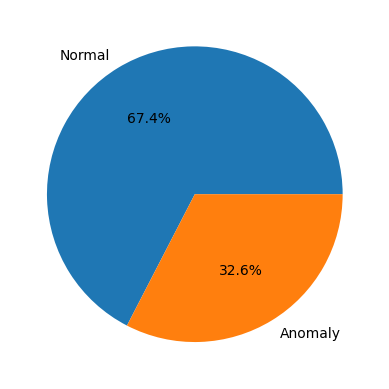

In [70]:
plt.pie(Label_Counts, labels=['Normal', 'Anomaly'], autopct='%1.1f%%')
plt.plot()

In [71]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'is_anomaly'],
      dtype='object')

In [72]:
# df.drop(columns = ['matchDuration'],inplace=True)

In [73]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'is_anomaly'],
      dtype='object')

In [74]:
Label_Counts = df['is_anomaly'].value_counts()
Label_Counts

is_anomaly
0    294360
1    142291
Name: count, dtype: int64

In [75]:
yes=df[df["is_anomaly"]==1]
no=df[df["is_anomaly"]==0]

In [76]:
length_n=len(no)

In [77]:
YES=yes.sample(length_n,replace=True)

In [78]:
print(YES.shape)

(294360, 30)


In [79]:
print(no.shape)

(294360, 30)


In [80]:
df=pd.concat([YES,no],axis=0)
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,is_anomaly
38614,4eab5c1f99525c,c1ffaeaf35d4d0,1d4d8e819ff6f8,0.000000,9.59777,85.441711,7.180963,0.0,6.808967,11,...,0.0,0.0,0.0,0.0,0.0,9932.405075,19.385348,0,1.0000,1
425403,2c8d7bd6db069e,f2d34f957a5a94,fed5353761a8e3,4.485109,0.00000,0.000000,0.000000,0.0,0.000000,78,...,0.0,0.0,0.0,0.0,0.0,990.291349,16.905235,0,0.2609,1
185431,2d16f3ac406f76,5f47cf67f824e0,4ace82713e9caf,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,85,...,0.0,0.0,0.0,0.0,0.0,116.177013,6.815207,1481,0.0000,1
62593,44ee9cf5578297,d61dede948335a,383714611897f7,0.000000,0.00000,63.258927,0.000000,0.0,0.000000,71,...,0.0,0.0,0.0,0.0,0.0,232.524506,7.808022,0,0.4000,1
439040,652e83da134fa9,0ce4e52b40fff1,089aab87115e11,0.000000,0.00000,108.955778,0.000000,0.0,0.000000,50,...,0.0,0.0,0.0,0.0,0.0,4350.314384,26.769337,1461,0.6154,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434014,08d714d9a8a5d6,8cba6aef84ada7,e7f3dbe327bc3f,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,98,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1433,0.0000,0
434015,4feb17fdb576e0,97ece12d55ab92,63310328cc69b9,0.000000,5.00000,63.140000,0.000000,0.0,5.000000,52,...,6999.0,0.0,0.0,0.0,0.0,2966.000000,7.000000,0,0.6538,0
434017,b34280b1e870ad,44572e42ae6a86,178e56f41675a8,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,55,...,0.0,0.0,0.0,0.0,0.0,408.300000,5.000000,0,0.4800,0
434018,7813c3440b98eb,4b33ca58b61702,0ae61a4ba3d60e,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,60,...,955.3,0.0,0.0,0.0,0.0,304.000000,0.000000,1486,0.3095,0


In [81]:
df.reset_index(drop=True,inplace=True)

In [82]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,is_anomaly
0,4eab5c1f99525c,c1ffaeaf35d4d0,1d4d8e819ff6f8,0.000000,9.59777,85.441711,7.180963,0.0,6.808967,11,...,0.0,0.0,0.0,0.0,0.0,9932.405075,19.385348,0,1.0000,1
1,2c8d7bd6db069e,f2d34f957a5a94,fed5353761a8e3,4.485109,0.00000,0.000000,0.000000,0.0,0.000000,78,...,0.0,0.0,0.0,0.0,0.0,990.291349,16.905235,0,0.2609,1
2,2d16f3ac406f76,5f47cf67f824e0,4ace82713e9caf,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,85,...,0.0,0.0,0.0,0.0,0.0,116.177013,6.815207,1481,0.0000,1
3,44ee9cf5578297,d61dede948335a,383714611897f7,0.000000,0.00000,63.258927,0.000000,0.0,0.000000,71,...,0.0,0.0,0.0,0.0,0.0,232.524506,7.808022,0,0.4000,1
4,652e83da134fa9,0ce4e52b40fff1,089aab87115e11,0.000000,0.00000,108.955778,0.000000,0.0,0.000000,50,...,0.0,0.0,0.0,0.0,0.0,4350.314384,26.769337,1461,0.6154,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588715,08d714d9a8a5d6,8cba6aef84ada7,e7f3dbe327bc3f,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,98,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1433,0.0000,0
588716,4feb17fdb576e0,97ece12d55ab92,63310328cc69b9,0.000000,5.00000,63.140000,0.000000,0.0,5.000000,52,...,6999.0,0.0,0.0,0.0,0.0,2966.000000,7.000000,0,0.6538,0
588717,b34280b1e870ad,44572e42ae6a86,178e56f41675a8,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,55,...,0.0,0.0,0.0,0.0,0.0,408.300000,5.000000,0,0.4800,0
588718,7813c3440b98eb,4b33ca58b61702,0ae61a4ba3d60e,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,60,...,955.3,0.0,0.0,0.0,0.0,304.000000,0.000000,1486,0.3095,0


In [83]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'is_anomaly'],
      dtype='object')

In [84]:
df.drop(columns = ['Id','groupId','matchId','matchType'],inplace=True)

In [85]:
correlation_matrix = df.corr()

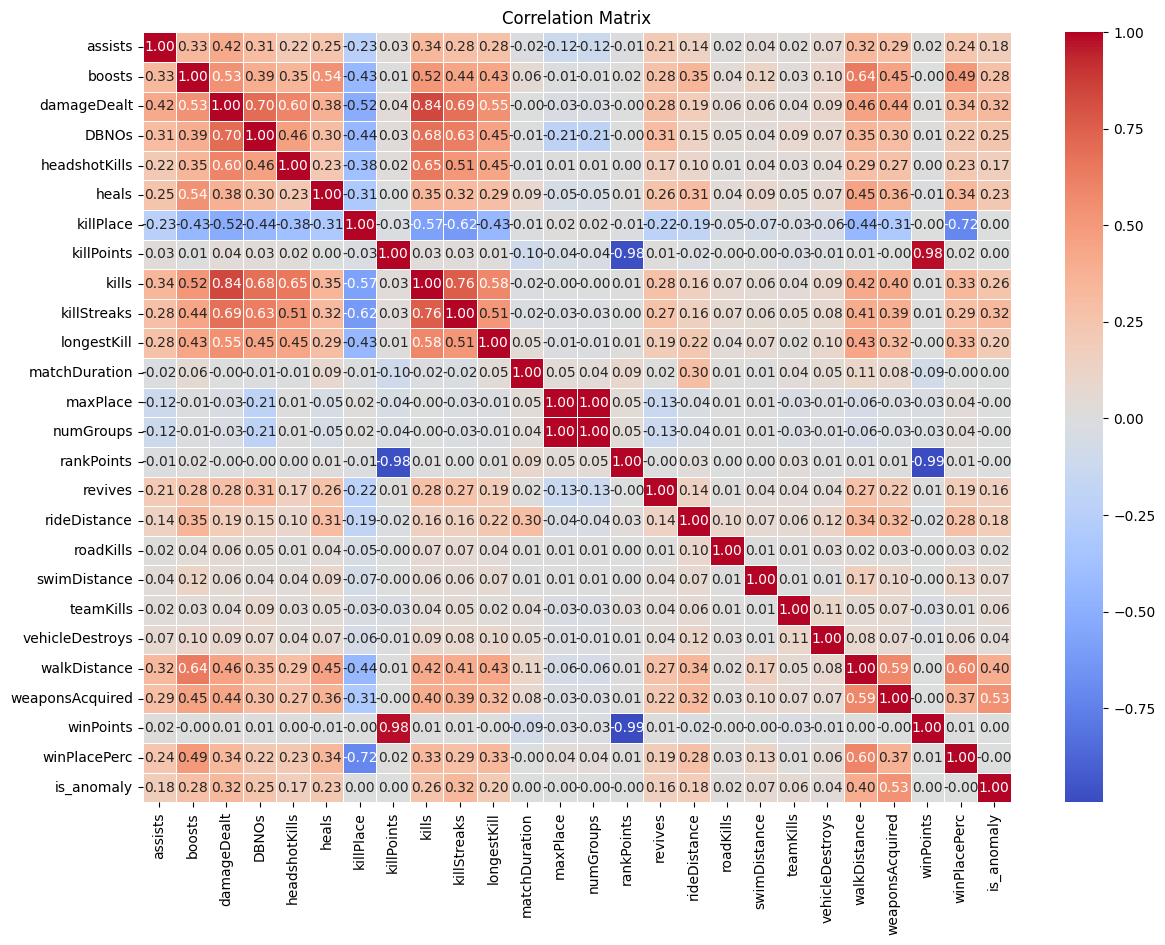

In [86]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [87]:
correlations = df.corr()['is_anomaly'].abs().sort_values(ascending=False)
print(correlations)

is_anomaly         1.000000
weaponsAcquired    0.534637
walkDistance       0.397266
killStreaks        0.323989
damageDealt        0.323191
boosts             0.278934
kills              0.259021
DBNOs              0.250513
heals              0.226091
longestKill        0.200857
rideDistance       0.183809
assists            0.177919
headshotKills      0.172298
revives            0.159337
swimDistance       0.068012
teamKills          0.064351
vehicleDestroys    0.038898
roadKills          0.022945
numGroups          0.002373
maxPlace           0.002325
winPlacePerc       0.001844
killPlace          0.001649
killPoints         0.001293
winPoints          0.001141
rankPoints         0.001095
matchDuration      0.000730
Name: is_anomaly, dtype: float64


In [88]:
df.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'is_anomaly'],
      dtype='object')

In [89]:
df.drop(columns=['winPlacePerc','winPoints','rankPoints','numGroups','maxPlace','killPoints','killPlace'],inplace=True)
# Match Duration not deleted

In [90]:
df.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'kills', 'killStreaks', 'longestKill', 'matchDuration', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'is_anomaly'],
      dtype='object')

In [91]:
# FEATURE ENGINEERING

In [92]:
# A high kill efficiency could indicate the use of cheats like aimbots, which allow players to eliminate opponents with minimal effort.
df['killEfficiency'] = df['kills'] / (df['damageDealt'] + 1e-6)

In [93]:
# An unusually high combat intensity might suggest the player is engaging in excessive combat, which could be indicative of cheating.
df['combatIntensity'] = df['kills'] + df['DBNOs'] + df['assists']

In [94]:
# A high healing efficiency could indicate the use of cheats that allow players to heal themselves or their teammates at an unrealistic rate.
df['healingEfficiency'] = df['heals'] / (df['boosts'] + 1e-6)

In [95]:
#  An anomalously high movement speed might suggest the use of speed hacks or teleportation cheats.
df['movementSpeed'] = (df['walkDistance'] + df['rideDistance'] + df['swimDistance']) / (df['matchDuration'] + 1e-6)

In [96]:
# Team work
df['teamwork'] = df['assists'] + df['revives']

In [97]:
# A high weapon acquisition rate could indicate the use of cheats that allow players to gather resources quickly.
df['weaponAcquisitionRate'] = df['weaponsAcquired'] / (df['matchDuration'] + 1e-6)


In [98]:
# An unusually high headshot accuracy might suggest the use of aimbots or other cheats that improve shooting accuracy.
df['headshotAccuracy'] = df['headshotKills'] / (df['kills'] + 1e-6)


In [99]:
df

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchDuration,...,walkDistance,weaponsAcquired,is_anomaly,killEfficiency,combatIntensity,healingEfficiency,movementSpeed,teamwork,weaponAcquisitionRate,headshotAccuracy
0,0.000000,9.59777,85.441711,7.180963,0.0,6.808967,4.104981,4.528774,470.967241,1891,...,9932.405075,19.385348,1,0.048044,11.285945,0.709432,5.252462,4.430368,0.010251,0.0
1,4.485109,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1502,...,990.291349,16.905235,1,0.000000,4.485109,0.000000,0.659315,4.485109,0.011255,0.0
2,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1363,...,116.177013,6.815207,1,0.000000,0.000000,0.000000,0.085236,0.000000,0.005000,0.0
3,0.000000,0.00000,63.258927,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1322,...,232.524506,7.808022,1,0.000000,0.000000,0.000000,0.175888,0.000000,0.005906,0.0
4,0.000000,0.00000,108.955778,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1383,...,4350.314384,26.769337,1,0.000000,0.000000,0.000000,3.145564,0.000000,0.019356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588715,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1400,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
588716,0.000000,5.00000,63.140000,0.000000,0.0,5.000000,0.000000,0.000000,0.000000,2028,...,2966.000000,7.000000,0,0.000000,0.000000,1.000000,4.913708,0.000000,0.003452,0.0
588717,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1321,...,408.300000,5.000000,0,0.000000,0.000000,0.000000,0.309084,1.000000,0.003785,0.0
588718,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1784,...,304.000000,0.000000,0,0.000000,0.000000,0.000000,0.705886,0.000000,0.000000,0.0


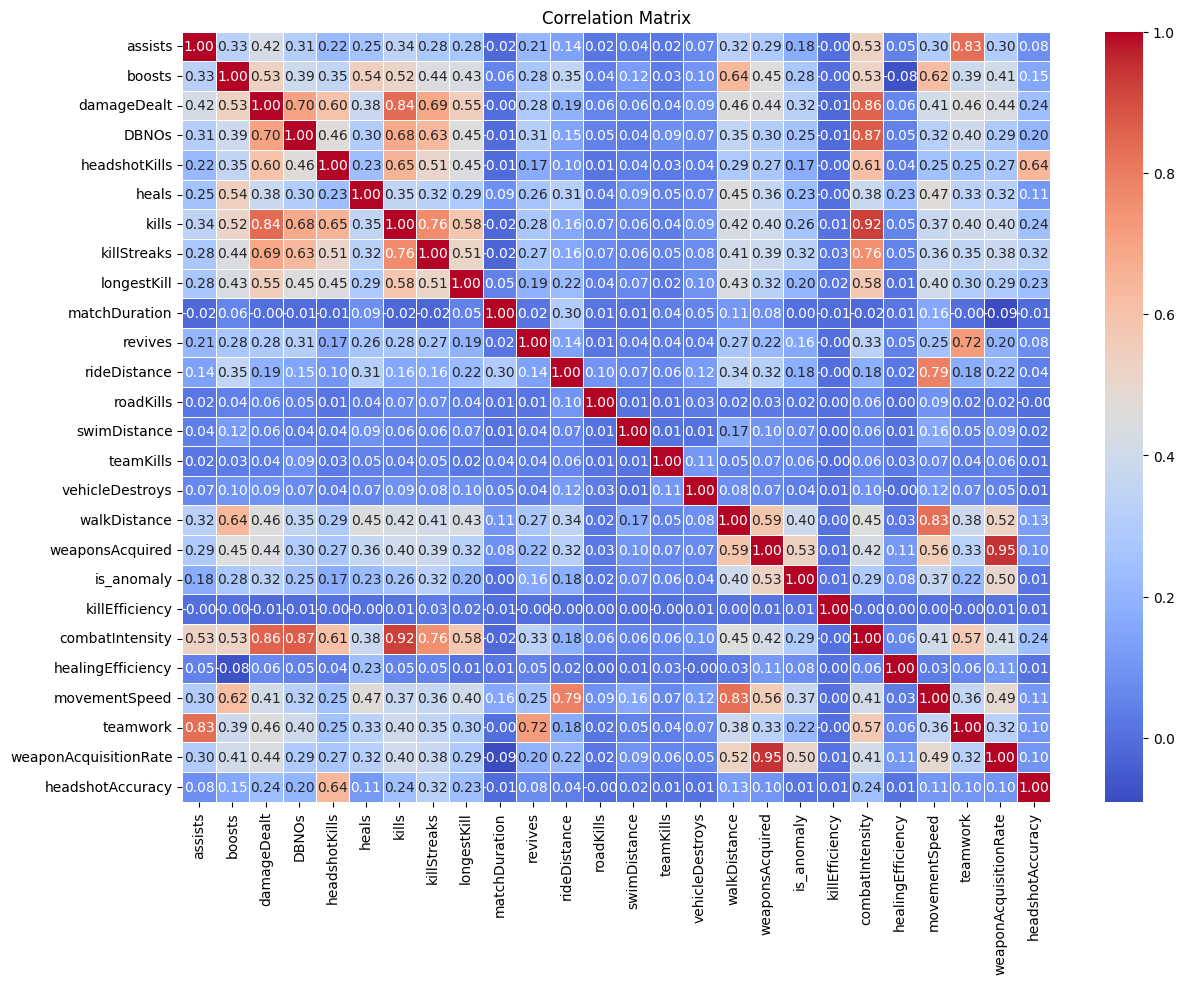

In [100]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [101]:
df

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchDuration,...,walkDistance,weaponsAcquired,is_anomaly,killEfficiency,combatIntensity,healingEfficiency,movementSpeed,teamwork,weaponAcquisitionRate,headshotAccuracy
0,0.000000,9.59777,85.441711,7.180963,0.0,6.808967,4.104981,4.528774,470.967241,1891,...,9932.405075,19.385348,1,0.048044,11.285945,0.709432,5.252462,4.430368,0.010251,0.0
1,4.485109,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1502,...,990.291349,16.905235,1,0.000000,4.485109,0.000000,0.659315,4.485109,0.011255,0.0
2,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1363,...,116.177013,6.815207,1,0.000000,0.000000,0.000000,0.085236,0.000000,0.005000,0.0
3,0.000000,0.00000,63.258927,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1322,...,232.524506,7.808022,1,0.000000,0.000000,0.000000,0.175888,0.000000,0.005906,0.0
4,0.000000,0.00000,108.955778,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1383,...,4350.314384,26.769337,1,0.000000,0.000000,0.000000,3.145564,0.000000,0.019356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588715,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1400,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
588716,0.000000,5.00000,63.140000,0.000000,0.0,5.000000,0.000000,0.000000,0.000000,2028,...,2966.000000,7.000000,0,0.000000,0.000000,1.000000,4.913708,0.000000,0.003452,0.0
588717,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1321,...,408.300000,5.000000,0,0.000000,0.000000,0.000000,0.309084,1.000000,0.003785,0.0
588718,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1784,...,304.000000,0.000000,0,0.000000,0.000000,0.000000,0.705886,0.000000,0.000000,0.0


In [102]:
df.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'kills', 'killStreaks', 'longestKill', 'matchDuration', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'is_anomaly',
       'killEfficiency', 'combatIntensity', 'healingEfficiency',
       'movementSpeed', 'teamwork', 'weaponAcquisitionRate',
       'headshotAccuracy'],
      dtype='object')

In [103]:
df = df[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'kills', 'killStreaks', 'longestKill', 'matchDuration', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'killEfficiency', 'combatIntensity', 'healingEfficiency',
       'movementSpeed', 'teamwork', 'weaponAcquisitionRate',
       'headshotAccuracy', 'is_anomaly']]

In [104]:
df.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'kills', 'killStreaks', 'longestKill', 'matchDuration', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'killEfficiency',
       'combatIntensity', 'healingEfficiency', 'movementSpeed', 'teamwork',
       'weaponAcquisitionRate', 'headshotAccuracy', 'is_anomaly'],
      dtype='object')

In [105]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [106]:
x

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchDuration,...,vehicleDestroys,walkDistance,weaponsAcquired,killEfficiency,combatIntensity,healingEfficiency,movementSpeed,teamwork,weaponAcquisitionRate,headshotAccuracy
0,0.000000,9.59777,85.441711,7.180963,0.0,6.808967,4.104981,4.528774,470.967241,1891,...,0.0,9932.405075,19.385348,0.048044,11.285945,0.709432,5.252462,4.430368,0.010251,0.0
1,4.485109,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1502,...,0.0,990.291349,16.905235,0.000000,4.485109,0.000000,0.659315,4.485109,0.011255,0.0
2,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1363,...,0.0,116.177013,6.815207,0.000000,0.000000,0.000000,0.085236,0.000000,0.005000,0.0
3,0.000000,0.00000,63.258927,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1322,...,0.0,232.524506,7.808022,0.000000,0.000000,0.000000,0.175888,0.000000,0.005906,0.0
4,0.000000,0.00000,108.955778,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1383,...,0.0,4350.314384,26.769337,0.000000,0.000000,0.000000,3.145564,0.000000,0.019356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588715,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1400,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
588716,0.000000,5.00000,63.140000,0.000000,0.0,5.000000,0.000000,0.000000,0.000000,2028,...,0.0,2966.000000,7.000000,0.000000,0.000000,1.000000,4.913708,0.000000,0.003452,0.0
588717,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1321,...,0.0,408.300000,5.000000,0.000000,0.000000,0.000000,0.309084,1.000000,0.003785,0.0
588718,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1784,...,0.0,304.000000,0.000000,0.000000,0.000000,0.000000,0.705886,0.000000,0.000000,0.0


In [107]:
y

0         1
1         1
2         1
3         1
4         1
         ..
588715    0
588716    0
588717    0
588718    0
588719    0
Name: is_anomaly, Length: 588720, dtype: int64

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [109]:
mm = MinMaxScaler()
mm.fit(x_train)
x_train = mm.transform(x_train)
x_test = mm.transform(x_test)

In [110]:
x_train

array([[0.        , 0.04274166, 0.01762229, ..., 0.05813222, 0.04312177,
        0.48844473],
       [0.        , 0.        , 0.02258942, ..., 0.0416237 , 0.02763895,
        0.        ],
       [0.        , 0.        , 0.00572047, ..., 0.01469758, 0.00236038,
        0.        ],
       ...,
       [0.        , 0.        , 0.00407441, ..., 0.        , 0.00981834,
        0.        ],
       [0.        , 0.        , 0.01816985, ..., 0.        , 0.01002266,
        0.        ],
       [0.08213021, 0.05392584, 0.02254577, ..., 0.06692701, 0.05535934,
        0.        ]])

In [111]:
x_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.00895102,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00129729, ..., 0.        , 0.00331195,
        0.        ],
       ...,
       [0.        , 0.        , 0.00240472, ..., 0.        , 0.0164525 ,
        0.        ],
       [0.        , 0.0286288 , 0.01109055, ..., 0.        , 0.01996125,
        0.13649934],
       [0.        , 0.        , 0.        , ..., 0.        , 0.05591159,
        0.        ]])

In [112]:
len(x_test[0])

25

In [113]:
model = xgb.XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [114]:
y_pred = model.predict(x_test)

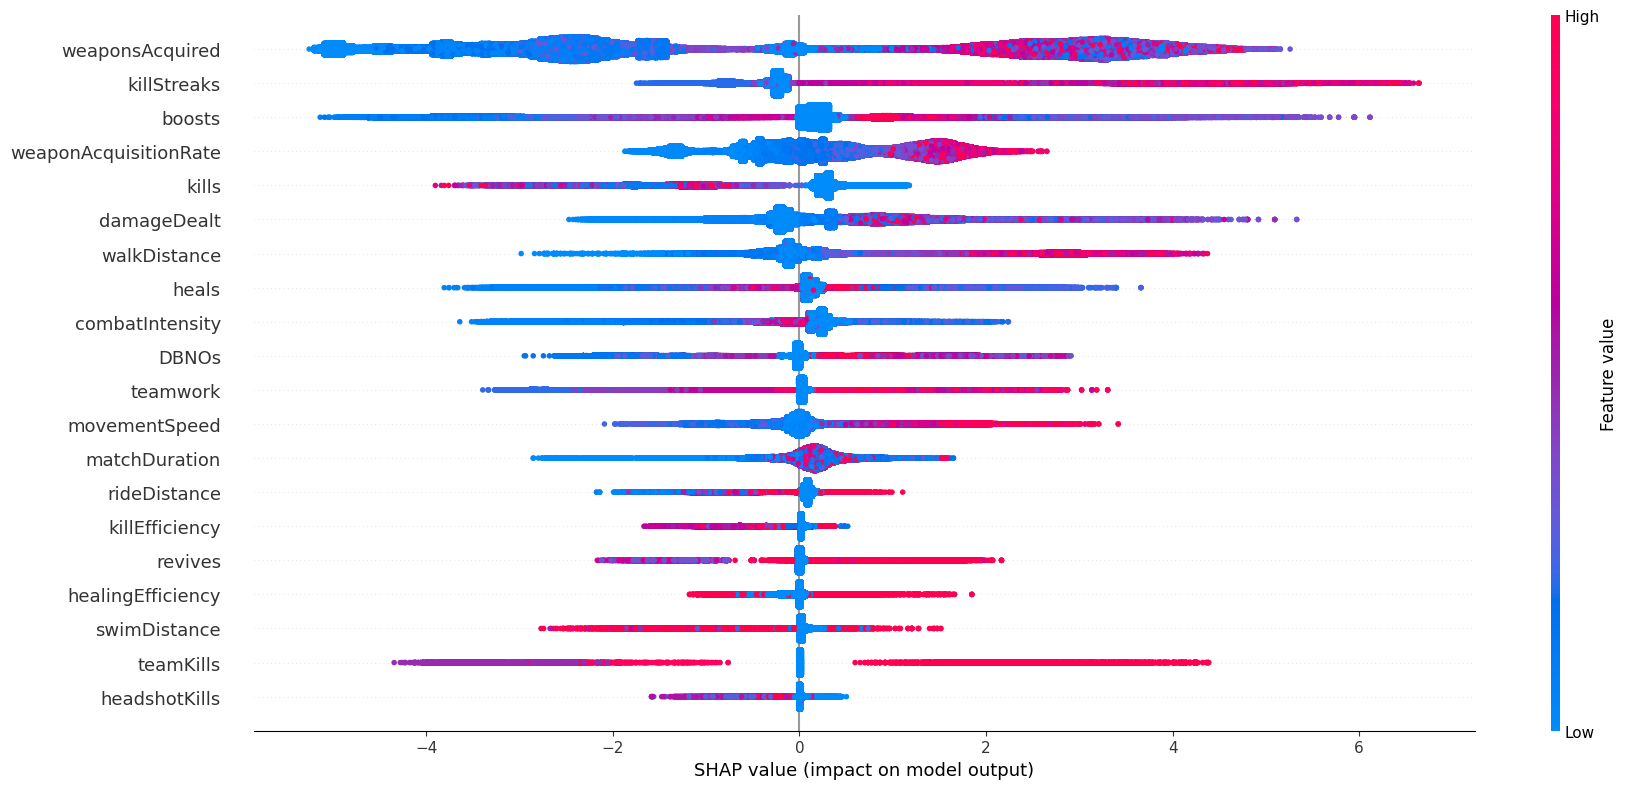

In [115]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, feature_names=df.columns,plot_size=(18, 8))

In [116]:
shap_values = explainer.shap_values(x_test)

In [117]:
len(df.columns)

26

In [118]:
df.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'kills', 'killStreaks', 'longestKill', 'matchDuration', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'killEfficiency',
       'combatIntensity', 'healingEfficiency', 'movementSpeed', 'teamwork',
       'weaponAcquisitionRate', 'headshotAccuracy', 'is_anomaly'],
      dtype='object')

In [119]:
features = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'kills', 'killStreaks', 'longestKill', 'matchDuration', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'killEfficiency',
       'combatIntensity', 'healingEfficiency', 'movementSpeed', 'teamwork',
       'weaponAcquisitionRate', 'headshotAccuracy']

In [120]:
shap.initjs()  # Prepares interactive plots for the notebook.

instance_index = 0  # We choose the first test sample.
force_plot = shap.force_plot(
    explainer.expected_value, 
    shap_values[instance_index, :], 
    x_test[instance_index, :], 
    feature_names=features
)
force_plot

In [121]:
comparision_df = pd.DataFrame({
    'Prediction' : y_pred,
    'Actual' : y_test
})
comparision_df

,Prediction,Actual
40205,1,1
87642,1,1
392728,0,0
356808,0,0
476020,0,0
...,...,...
320711,0,0
519420,0,0
326122,0,0
451619,0,0


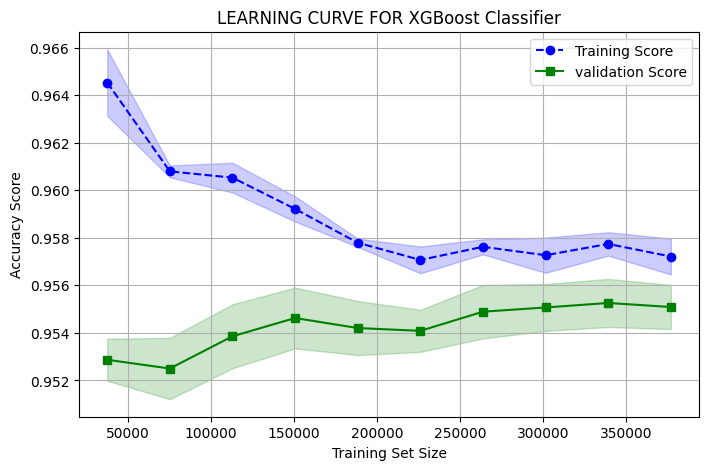

In [122]:
# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, x_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'b--', marker='o', label="Training Score")  # Dashed blue
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)

plt.plot(train_sizes, test_mean, 'g-', marker='s', label="validation Score")  # Solid green
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

plt.title("LEARNING CURVE FOR XGBoost Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [123]:
accuracy_score = accuracy_score(y_test,y_pred)
print(accuracy_score*100,'%')

95.24816551161842 %


In [124]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[55758  3191]
 [ 2404 56391]]


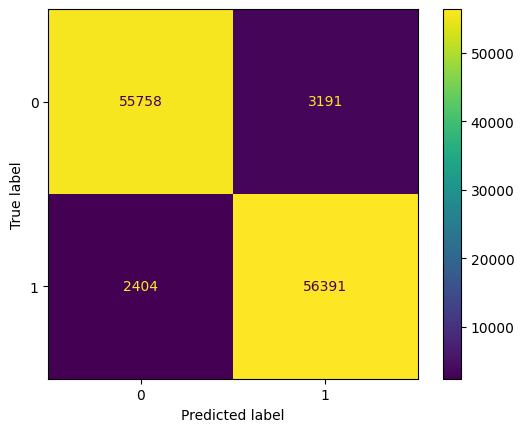

In [125]:
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix)
confusion_matrix_display.plot()

In [126]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     58949
           1       0.95      0.96      0.95     58795

    accuracy                           0.95    117744
   macro avg       0.95      0.95      0.95    117744
weighted avg       0.95      0.95      0.95    117744

